In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'/Users/weilu/Research/opt_server/')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from Bio.PDB.Polypeptide import d1_to_index
from Bio.PDB.Polypeptide import dindex_to_1
from Bio.PDB.Polypeptide import aa3

In [3]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [7]:
decoy_structures, Qs = read_decoy_structures_andQ("/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/optimization_larger_excl_withoutBurial/decoys/openMM/2hbg_iteration_0_stronger_exclude_volume.pkl")

In [48]:
def calculate_cb_density(res_list, neighbor_list, min_seq_sep=2, rmin=2.5):
    num_residues = len(res_list)
    density = np.zeros(num_residues)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, 9.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            if abs(res2index - res1index) >= min_seq_sep or (res1chain != res2chain):
                rij = get_interaction_distance(res1, res2)
                # print(res1index, res2index, res1.resname, res2.resname, rij)
                density[res1globalindex] += interaction_well(rij, rmin, 6.5, 5)
    return density

def calculate_com_density(res_list, neighbor_list, min_seq_sep=2, rmin=2.5):
    num_residues = len(res_list)
    density = np.zeros(num_residues)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, 9.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            if abs(res2index - res1index) >= min_seq_sep or (res1chain != res2chain):
                rij = get_interaction_distance_com(res1, res2)
                # print(res1index, res2index, res1.resname, res2.resname, rij)
                density[res1globalindex] += interaction_well(rij, rmin, 6.5, 5)
    return density

In [49]:
decoy_structure = decoy_structures[0]
decoy_res_list = get_res_list(decoy_structure)
decoy_neighbor_list = get_neighbor_list(decoy_structure)
parameters = ['6.5', '9.5', '5.0', '10', '2.6', '7.0']
cb_density = calculate_cb_density(decoy_res_list, decoy_neighbor_list)
com_density = calculate_com_density(decoy_res_list, decoy_neighbor_list)

In [41]:
decoy_structure = decoy_structures[0]
decoy_res_list = get_res_list(decoy_structure)
decoy_neighbor_list = get_neighbor_list(decoy_structure)
parameters = ['6.5', '9.5', '5.0', '10', '2.6', '7.0']
# cb_density = calculate_cb_density(decoy_res_list, decoy_neighbor_list)
com_density = calculate_com_density(decoy_res_list, decoy_neighbor_list)

1 124 GLY ALA 10.756355944715118
1 126 GLY ALA 9.450908616091716
1 129 GLY ALA 6.972288973074909
1 3 GLY SER 7.956438541717136
1 132 GLY ALA 8.554597393418478
1 4 GLY ALA 11.09560777793327
1 6 GLY GLN 6.840086794141465
1 76 GLY GLU 5.496064847278664
1 125 GLY ALA 6.033626829950169
1 128 GLY ASP 6.4154367975025846
1 7 GLY ARG 8.961978271739563
2 74 LEU GLY 2.7607697356066043
2 79 LEU MET 5.898724625054345
2 131 LEU ALA 10.102442316092352
2 76 LEU GLU 5.209974700228813
2 127 LEU LYS 12.796447401374841
2 128 LEU ASP 8.522284695207768
2 133 LEU ALA 8.013541786375027
2 5 LEU ALA 10.505553386681052
2 72 LEU HIS 10.632264160808601
2 70 LEU VAL 9.693551545532813
2 73 LEU LEU 5.487886636964622
2 130 LEU TRP 11.99209264691643
2 7 LEU ARG 5.445117498807297
2 10 LEU ILE 7.173135962563762
2 126 LEU ALA 8.062608004418582
2 80 LEU VAL 8.506394454315899
2 4 LEU ALA 9.494751928585721
2 132 LEU ALA 6.5948859762162115
2 75 LEU ASP 10.803230825481933
2 69 LEU ALA 8.75730229067413
2 8 LEU GLN 11.6310579585

17 10 ILE ILE 9.324670229535283
17 15 ILE LYS 10.055334060854303
17 67 ILE GLY 3.0056079057863285
17 12 ILE ALA 10.728396074688664
17 110 ILE LEU 5.947281132016243
17 63 ILE LEU 6.207405169554804
17 64 ILE ALA 9.892469736362683
17 115 ILE GLU 12.96062852856704
17 22 ILE ASN 11.287429239848851
17 112 ILE SER 11.183684623931104
17 117 ILE ARG 6.178072412157924
17 14 ILE TRP 6.4578419248632075
17 66 ILE ILE 6.311519341789474
17 19 ILE GLY 3.0056079057863285
18 27 ALA GLY 1.4708019130200578
18 16 ALA ASP 8.230407355902273
18 68 ALA VAL 11.416808307168045
18 21 ALA ASP 8.203470061763948
18 24 ALA ALA 7.542506660752508
18 11 ALA ALA 11.109677095828964
18 13 ALA THR 9.933336434644053
18 65 ALA GLN 12.025073947059424
18 70 ALA VAL 8.96459779478885
18 23 ALA GLY 1.4708019130200578
18 26 ALA VAL 8.541962255462117
18 20 ALA ALA 8.051170059475279
18 15 ALA LYS 8.071120457198282
18 67 ALA GLY 1.4708019130200578
18 12 ALA ALA 11.57014494577596
18 63 ALA LEU 6.006805620852899
18 64 ALA ALA 7.25882912

42 36 ALA SER 9.473001306590739
42 38 ALA HIS 10.170533310522435
42 44 ALA VAL 7.345313451972062
42 46 ALA GLY 1.5329142879233186
42 49 ALA GLY 1.5329142879233186
42 34 ALA PHE 9.46341970176635
42 37 ALA ALA 10.92269750619462
42 39 ALA PRO 5.762735800258973
43 40 ALA GLN 9.534653669676212
43 45 ALA PHE 8.372526135927071
43 47 ALA PHE 9.59165879619528
43 48 ALA SER 10.893488210585701
43 38 ALA HIS 13.276432822696606
43 41 ALA MET 8.816882981327193
43 46 ALA GLY 1.573132490975322
43 96 ALA LYS 6.352871097628474
43 39 ALA PRO 9.376181554834467
44 40 VAL GLN 8.610174654573601
44 38 VAL HIS 10.702769979815265
44 41 VAL MET 6.327925793231347
44 46 VAL GLY 1.9429796079699402
44 98 VAL ILE 6.2771013724145535
44 103 VAL PHE 5.8726264182438594
44 100 VAL ALA 9.577354582665734
44 97 VAL HIS 9.698999911124268
44 102 VAL TYR 5.438260472020471
44 145 VAL LEU 6.31901289363694
44 34 VAL PHE 8.942072915394405
44 39 VAL PRO 10.436126457898721
44 42 VAL ALA 7.345313451972062
44 47 VAL PHE 8.8101852021624

64 66 ALA ILE 7.732663425932236
65 62 GLN VAL 6.462203640530316
65 68 GLN VAL 5.574815005144778
65 139 GLN GLY 3.1896741297177487
65 133 GLN ALA 8.127633628948075
65 86 GLN VAL 7.1731081275305435
65 141 GLN LEU 9.770979409996842
65 70 GLN VAL 8.927185915803276
65 61 GLN LYS 9.332720883824777
65 83 GLN MET 8.170323169831677
65 135 GLN ALA 8.291824401226094
65 138 GLN SER 9.040514457928813
65 143 GLN SER 9.248933140163496
65 67 GLN GLY 3.1896741297177487
65 132 GLN ALA 10.394280599099847
65 140 GLN ALA 3.9276804350939925
65 63 GLN LEU 8.890771824899385
65 69 GLN ALA 5.840976064109264
65 136 GLN ASP 4.794177652254606
65 60 GLN ALA 11.526740111736588
65 82 GLN GLN 8.048919629747598
65 134 GLN TYR 10.338673026710515
65 137 GLN ILE 5.828034919144075
65 142 GLN ILE 10.194053615584354
66 62 ILE VAL 7.272433757511524
66 114 ILE MET 6.573765111229181
66 131 ILE ALA 11.233980730674107
66 68 ILE VAL 8.301664569944402
66 139 ILE GLY 2.899188222145193
66 133 ILE ALA 5.351800074911412
66 106 ILE LEU 

87 84 GLY LYS 7.737326883958691
87 135 GLY ALA 8.585736275751923
88 91 VAL LYS 5.709287207862477
88 92 VAL GLY 1.9996052528796866
88 82 VAL GLN 12.18410987918755
88 85 VAL ALA 5.773632288655655
88 90 VAL HIS 8.24592964837109
88 81 VAL ALA 10.862589538034042
88 83 VAL MET 10.49135757142416
88 84 VAL LYS 6.101460465276816
88 86 VAL VAL 8.161045959161974
89 91 ARG LYS 9.532032163797567
89 92 ARG GLY 3.6823899041503116
89 143 ARG SER 8.6755705006269
89 82 ARG GLN 10.517800441016554
89 85 ARG ALA 4.838591623385426
89 87 ARG GLY 3.6823899041503116
89 93 ARG TYR 6.283691284875029
89 81 ARG ALA 11.081728358183705
89 83 ARG MET 11.00399767972946
89 84 ARG LYS 9.230753919886773
89 86 ARG VAL 5.801026958002849
90 92 HIS GLY 3.3470422625124048
90 139 HIS GLY 3.3470422625124048
90 98 HIS ILE 6.6119093394841455
90 86 HIS VAL 8.254393069239464
90 94 HIS GLY 3.3470422625124048
90 146 HIS GLN 8.543554766849192
90 100 HIS ALA 6.843380548367839
90 83 HIS MET 11.305664279963478
90 135 HIS ALA 9.9589442141

114 127 MET LYS 11.037284752872225
114 116 MET HIS 9.703804018055974
114 133 MET ALA 5.6269666524691075
114 13 MET THR 5.8880301246411
114 111 MET LEU 4.886513601158492
114 70 MET VAL 6.1405624060872475
114 73 MET LEU 8.761061165689833
114 108 MET ALA 10.555625256924891
114 130 MET TRP 5.991985954837231
114 118 MET ILE 5.77061627686219
114 10 MET ILE 5.012542482628101
114 126 MET ALA 8.352839648124874
114 15 MET LYS 12.497548015241009
114 67 MET GLY 4.001780240159258
114 132 MET ALA 10.166483717295757
114 110 MET LEU 7.258377533794805
114 17 MET ILE 5.722735183493434
114 112 MET SER 9.026235682168421
114 129 MET ALA 7.862202908792726
114 117 MET ARG 7.57686251404704
114 6 MET GLN 11.035175164283133
114 134 MET TYR 11.05530330876758
114 9 MET VAL 9.21680805297985
114 107 MET GLY 4.001780240159258
114 14 MET TRP 8.948468533241975
114 66 MET ILE 6.573765111229181
115 121 GLU LYS 10.786653744350168
115 123 GLU ASN 11.17660570861101
115 126 GLU ALA 8.765939457921396
115 111 GLU LEU 9.667836

137 135 ILE ALA 7.301723240128793
137 104 ILE GLU 10.258033294875966
137 67 ILE GLY 2.404834821444949
137 132 ILE ALA 10.111644208463128
137 105 ILE PRO 10.581203454692682
137 58 ILE LEU 11.099993454905137
137 140 ILE ALA 6.605705440646754
137 110 ILE LEU 5.088350118044309
137 63 ILE LEU 7.462156525791373
137 64 ILE ALA 9.436293136604535
137 30 ILE CYS 8.711788042201306
137 112 ILE SER 11.593631457820008
137 134 ILE TYR 6.6484498075528995
137 107 ILE GLY 2.404834821444949
137 142 ILE ILE 9.397358123555225
137 66 ILE ILE 4.391829438007324
138 62 SER VAL 8.711332606246627
138 131 SER ALA 10.09553826473241
138 98 SER ILE 8.759280257999533
138 133 SER ALA 10.440656756220779
138 103 SER PHE 6.669197561816329
138 106 SER LEU 6.981957879756795
138 141 SER LEU 6.848164861733775
138 100 SER ALA 5.104195191514719
138 108 SER ALA 8.615350934351197
138 135 SER ALA 5.607357594773113
138 104 SER GLU 5.9740815407797525
138 143 SER SER 10.337359616966229
138 132 SER ALA 10.319126346535057
138 102 SER 

In [46]:
decoy_res_list[1]["CB"].get_coord()

array([138.452, -88.265, 150.778], dtype=float32)

In [45]:
decoy_res_list[73]["CA"].get_coord()

array([144.094, -95.033, 151.089], dtype=float32)

In [47]:
dis([138.452, -88.265, 150.778],[144.094, -95.033, 151.089] )

8.816728928576628

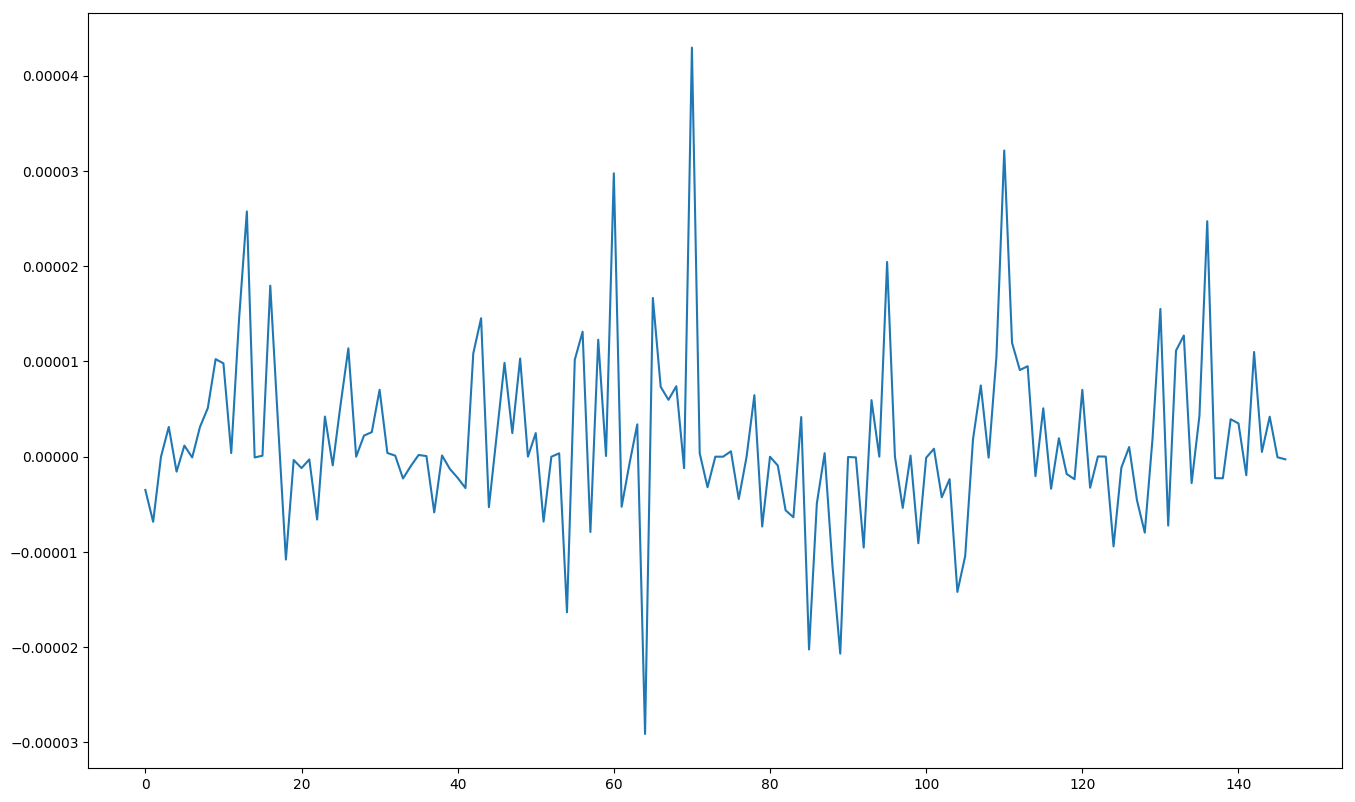

In [50]:
plt.plot(com_density - cb_density)

In [52]:

def phi_density_mediated_contact_com_well_debug(res_list, neighbor_list, parameter_list):
    r_min, r_max, kappa, min_seq_sep, density_threshold, density_kappa = parameter_list
    cb_density = calculate_com_density(res_list, neighbor_list)
    r_min = float(r_min)
    r_max = float(r_max)
    kappa = float(kappa)
    min_seq_sep = int(min_seq_sep)
    density_threshold = float(density_threshold)
    density_kappa = float(density_kappa)
    phi_mediated_contact_well = np.zeros((2, 20,20))
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        rho_i = cb_density[res1globalindex]
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            rho_j = cb_density[res2globalindex]
            # if res2index - res1index >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
            if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance_com(res1, res2)
                _pij_protein = prot_water_switchFunc_sigmaProt(
                    rho_i, rho_j, density_threshold, density_kappa) * interaction_well(rij, r_min, r_max, kappa)
                _pij_water = prot_water_switchFunc_sigmaWater(
                    rho_i, rho_j, density_threshold, density_kappa) * interaction_well(rij, r_min, r_max, kappa)
                phi_mediated_contact_well[0][res1type][res2type] += _pij_protein
                phi_mediated_contact_well[1][res1type][res2type] += _pij_water
                if not res1type == res2type:
                    phi_mediated_contact_well[0][res2type][res1type] += _pij_protein
                    phi_mediated_contact_well[1][res2type][res1type] += _pij_water

    phis_to_return = []
    for i in range(2):
        for j in range(20):
            for k in range(j, 20):
                phis_to_return.append(phi_mediated_contact_well[i][j][k])
    return phis_to_return, cb_density

def phi_density_mediated_contact_well_debug(res_list, neighbor_list, parameter_list):
    r_min, r_max, kappa, min_seq_sep, density_threshold, density_kappa = parameter_list
    cb_density = calculate_cb_density(res_list, neighbor_list)
    r_min = float(r_min)
    r_max = float(r_max)
    kappa = float(kappa)
    min_seq_sep = int(min_seq_sep)
    density_threshold = float(density_threshold)
    density_kappa = float(density_kappa)
    phi_mediated_contact_well = np.zeros((2, 20,20))
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        rho_i = cb_density[res1globalindex]
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            rho_j = cb_density[res2globalindex]
            # if res2index - res1index >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
            if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance(res1, res2)
                _pij_protein = prot_water_switchFunc_sigmaProt(
                    rho_i, rho_j, density_threshold, density_kappa) * interaction_well(rij, r_min, r_max, kappa)
                _pij_water = prot_water_switchFunc_sigmaWater(
                    rho_i, rho_j, density_threshold, density_kappa) * interaction_well(rij, r_min, r_max, kappa)
                phi_mediated_contact_well[0][res1type][res2type] += _pij_protein
                phi_mediated_contact_well[1][res1type][res2type] += _pij_water
                if not res1type == res2type:
                    phi_mediated_contact_well[0][res2type][res1type] += _pij_protein
                    phi_mediated_contact_well[1][res2type][res1type] += _pij_water

    phis_to_return = []
    for i in range(2):
        for j in range(20):
            for k in range(j, 20):
                phis_to_return.append(phi_mediated_contact_well[i][j][k])
    return phis_to_return, cb_density

In [58]:
decoy_structure = decoy_structures[0]
decoy_res_list = get_res_list(decoy_structure)
decoy_neighbor_list = get_neighbor_list(decoy_structure)
# parameters = ['6.5', '9.5', '5.0', '10', '2.6', '7.0']
parameters = ['2.5', '6.5', '5.0', '10']
mediated_com = phi_pairwise_contact_well(decoy_res_list, decoy_neighbor_list, parameters)
mediated = phi_pairwise_contact_com_well(decoy_res_list, decoy_neighbor_list, parameters)

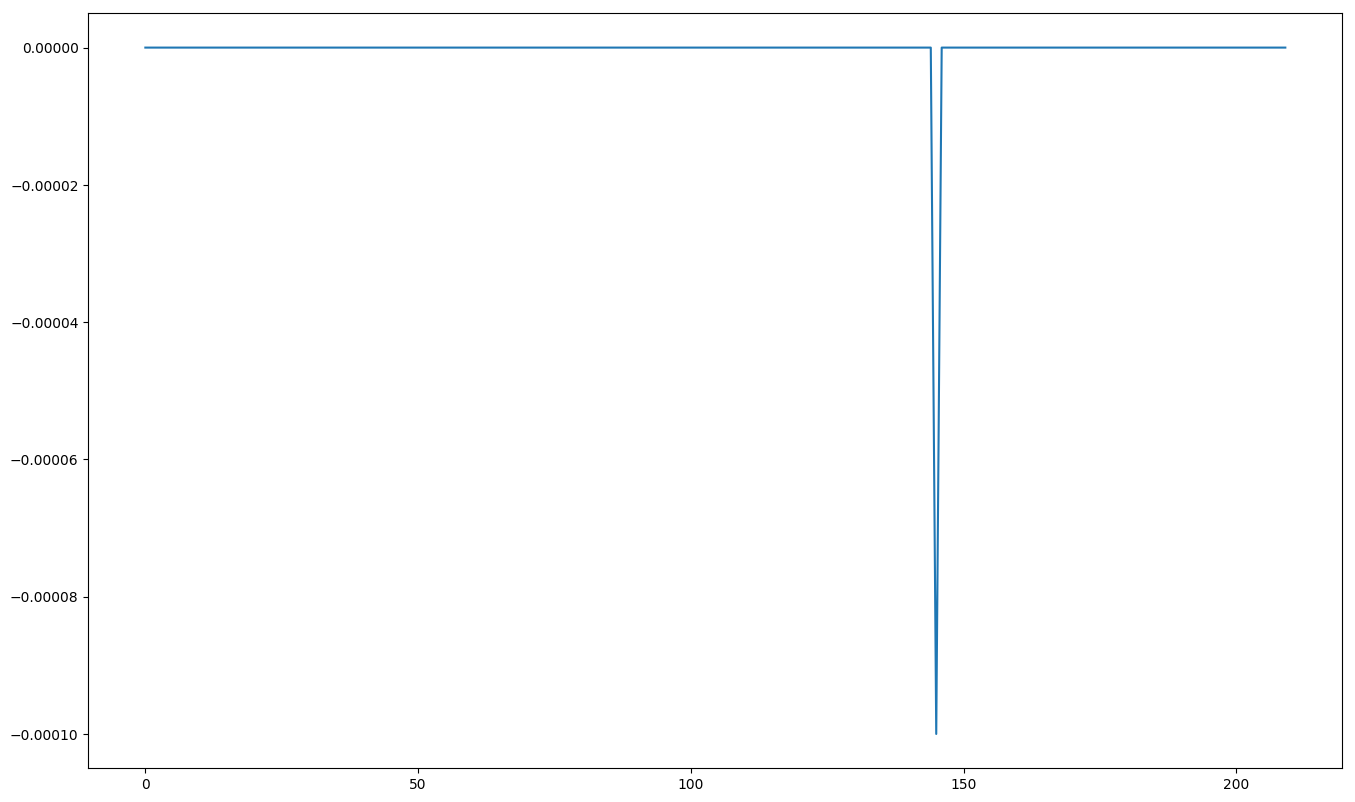

In [59]:
plt.plot(np.array(mediated_com)-np.array(mediated))

In [ ]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_new_4_without_burial/1poa/1/lastFrame.pdb"
parser = PDBParser()
s = parser.get_structure("X", pdbFile)
data = get_interaction_data(structure)a